# task 2


Loading data from: C:\Users\prags\Desktop\hackathon\EEG_Data\train_data
Selected Normal file: 6949.npy
Selected Complex_Partial_Seizures file: 2275.npy
Selected Electrographic_Seizures file: 127.npy
Selected Video_detected_Seizures_with_no_visual_change_over_EEG file: 3702.npy

Processing Normal
File not found: C:/Users/Shree Harish V/Desktop/Advitiya Hack/Normal_statistics.csv

Similarity Analysis:
------------------------------
Approximation   : 0.1922
Detail 1        : 1.1984
Detail 2        : 1.4590

Most similar coefficient: Detail 2
Similarity score: 1.4590


C:\Users\prags\anaconda3\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 2 is too high: all coefficients will experience boundary effects.
  warnings.warn(


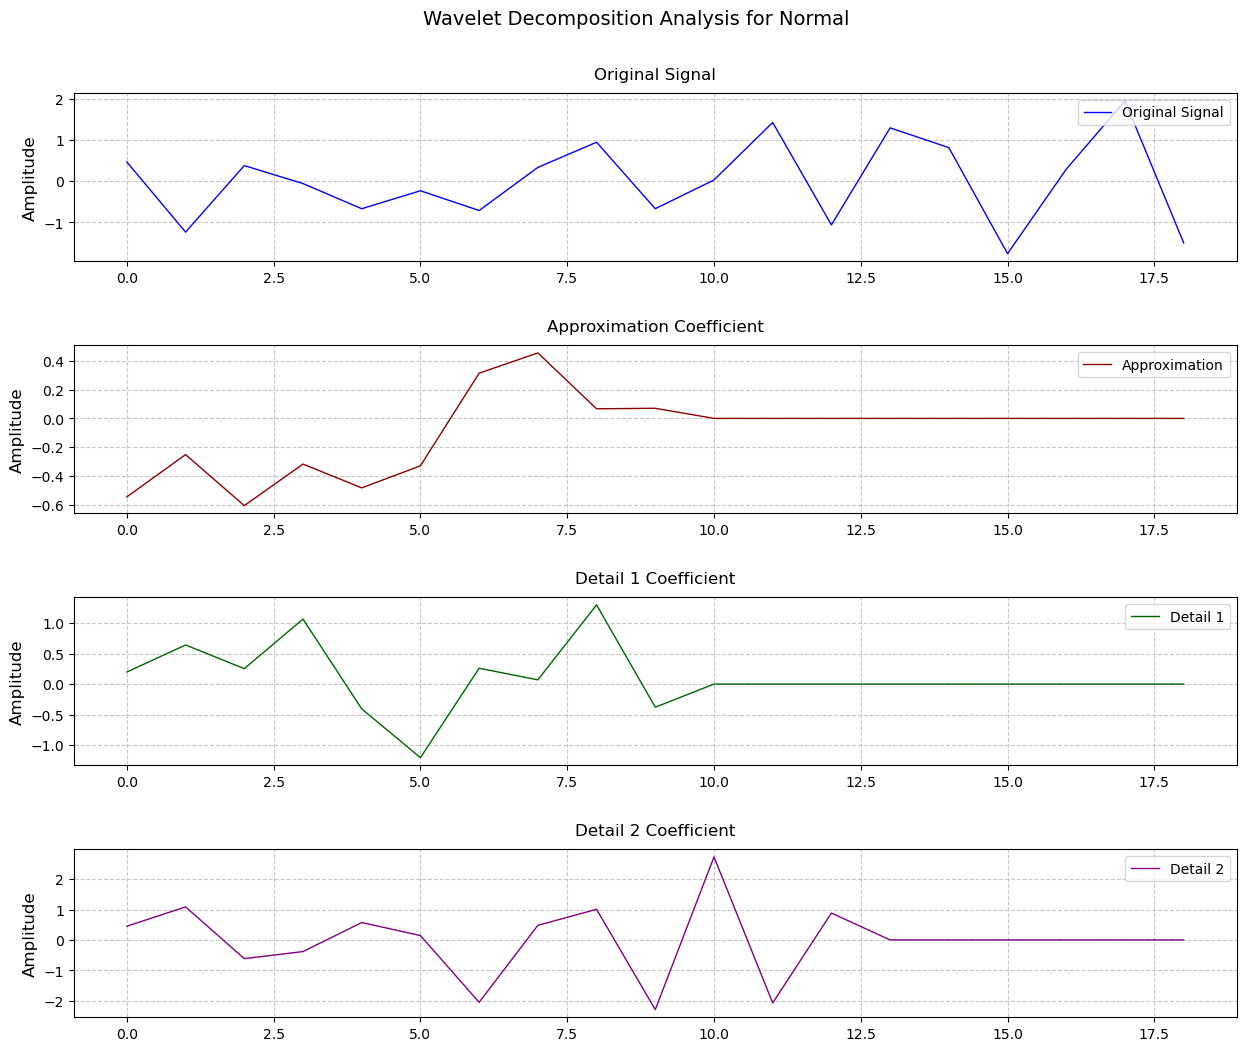

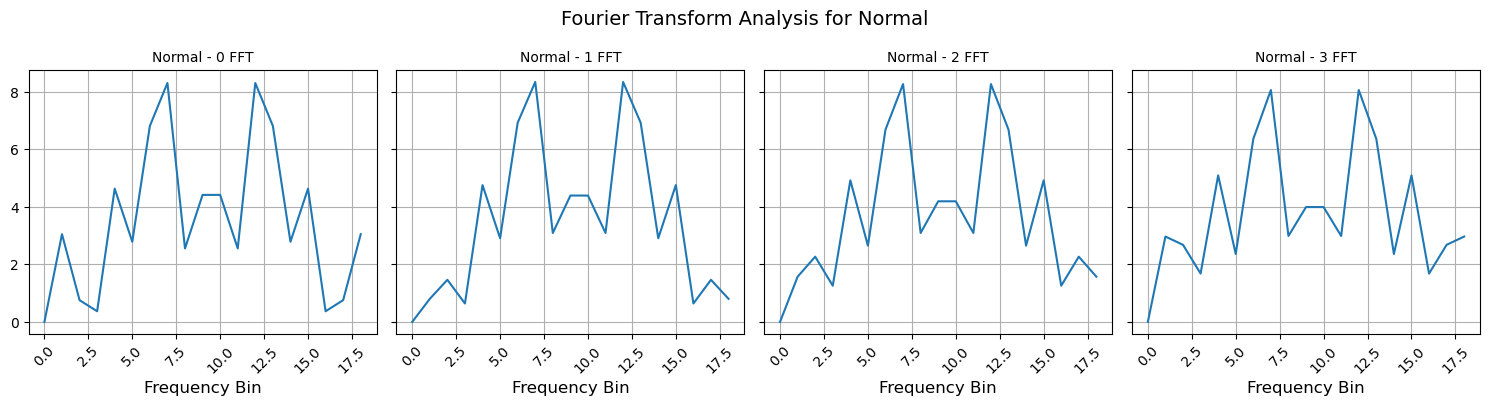

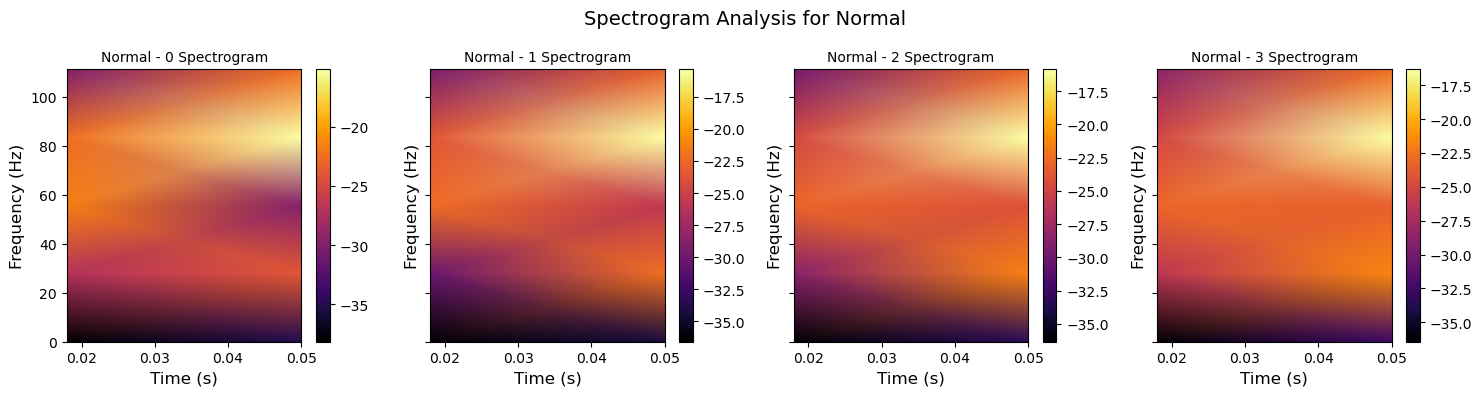


Processing Complex_Partial_Seizures
File not found: C:/Users/Shree Harish V/Desktop/Advitiya Hack/Complex_Partial_Seizures_statistics.csv

Similarity Analysis:
------------------------------
Approximation   : 2.2993
Detail 1        : 2.1595
Detail 2        : 3.5622

Most similar coefficient: Detail 2
Similarity score: 3.5622


C:\Users\prags\anaconda3\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 2 is too high: all coefficients will experience boundary effects.
  warnings.warn(


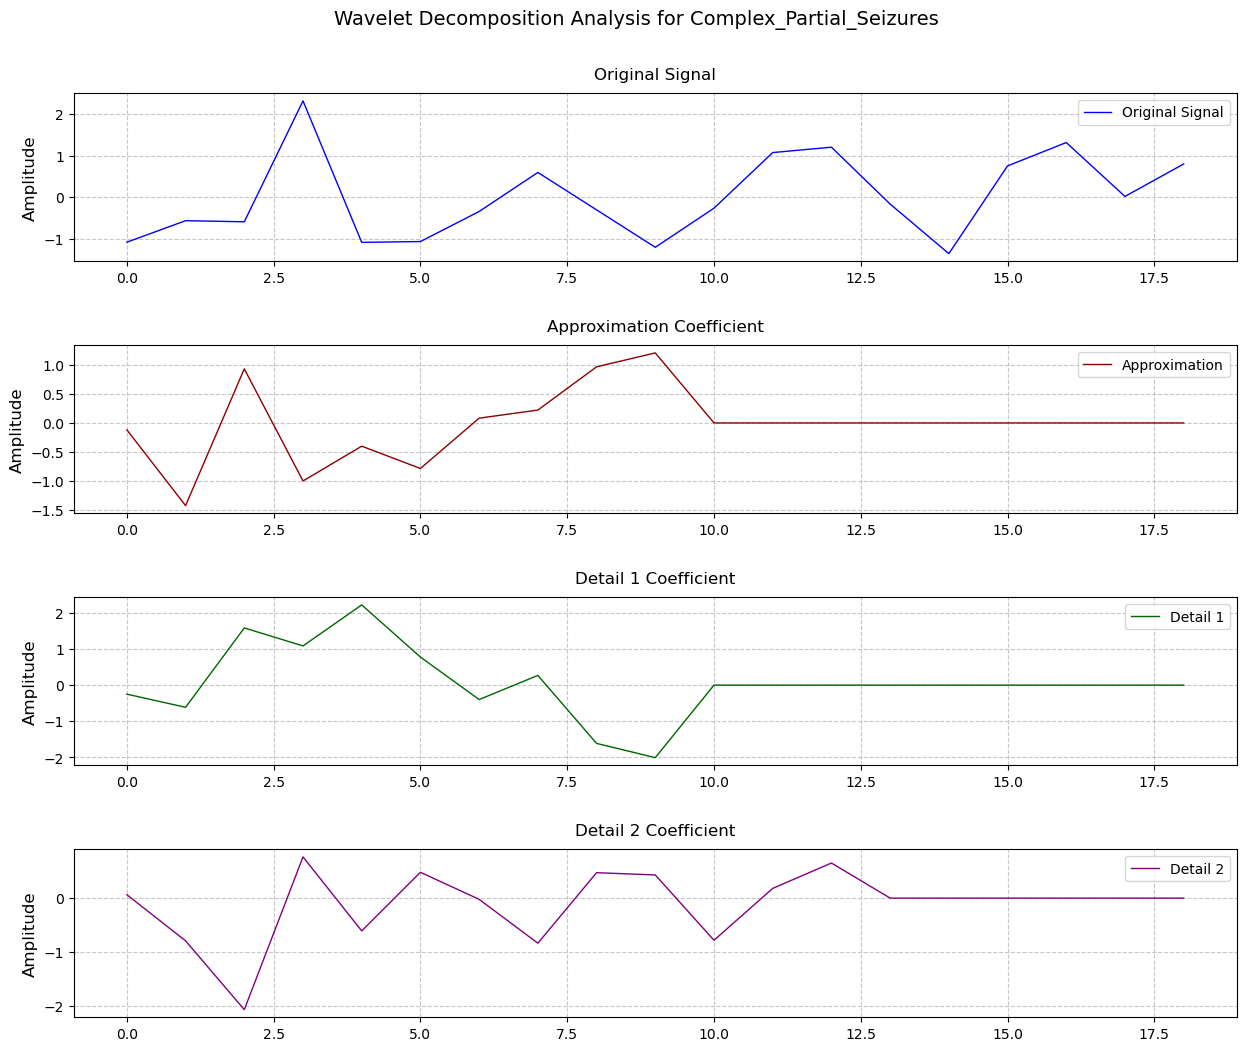

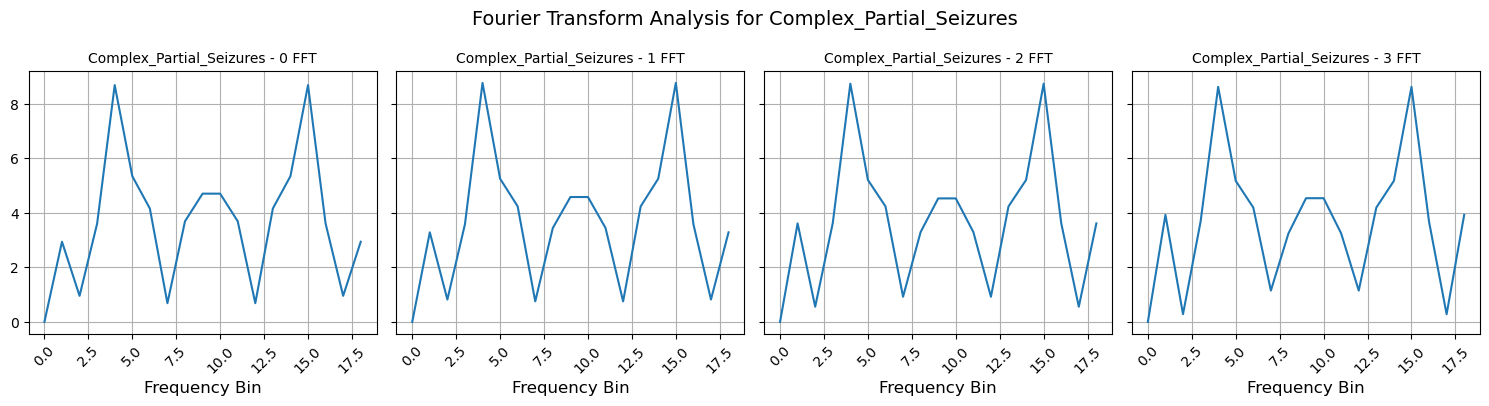

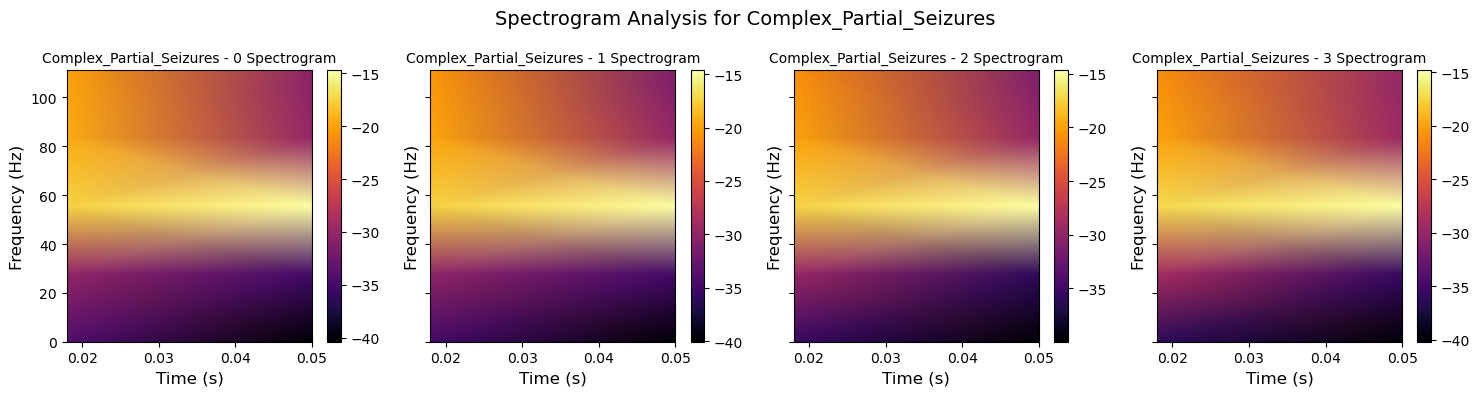


Processing Electrographic_Seizures
File not found: C:/Users/Shree Harish V/Desktop/Advitiya Hack/Electrographic_Seizures_statistics.csv

Similarity Analysis:
------------------------------
Approximation   : 3.0787
Detail 1        : 0.5159
Detail 2        : 0.2127

Most similar coefficient: Approximation
Similarity score: 3.0787


C:\Users\prags\anaconda3\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 2 is too high: all coefficients will experience boundary effects.
  warnings.warn(


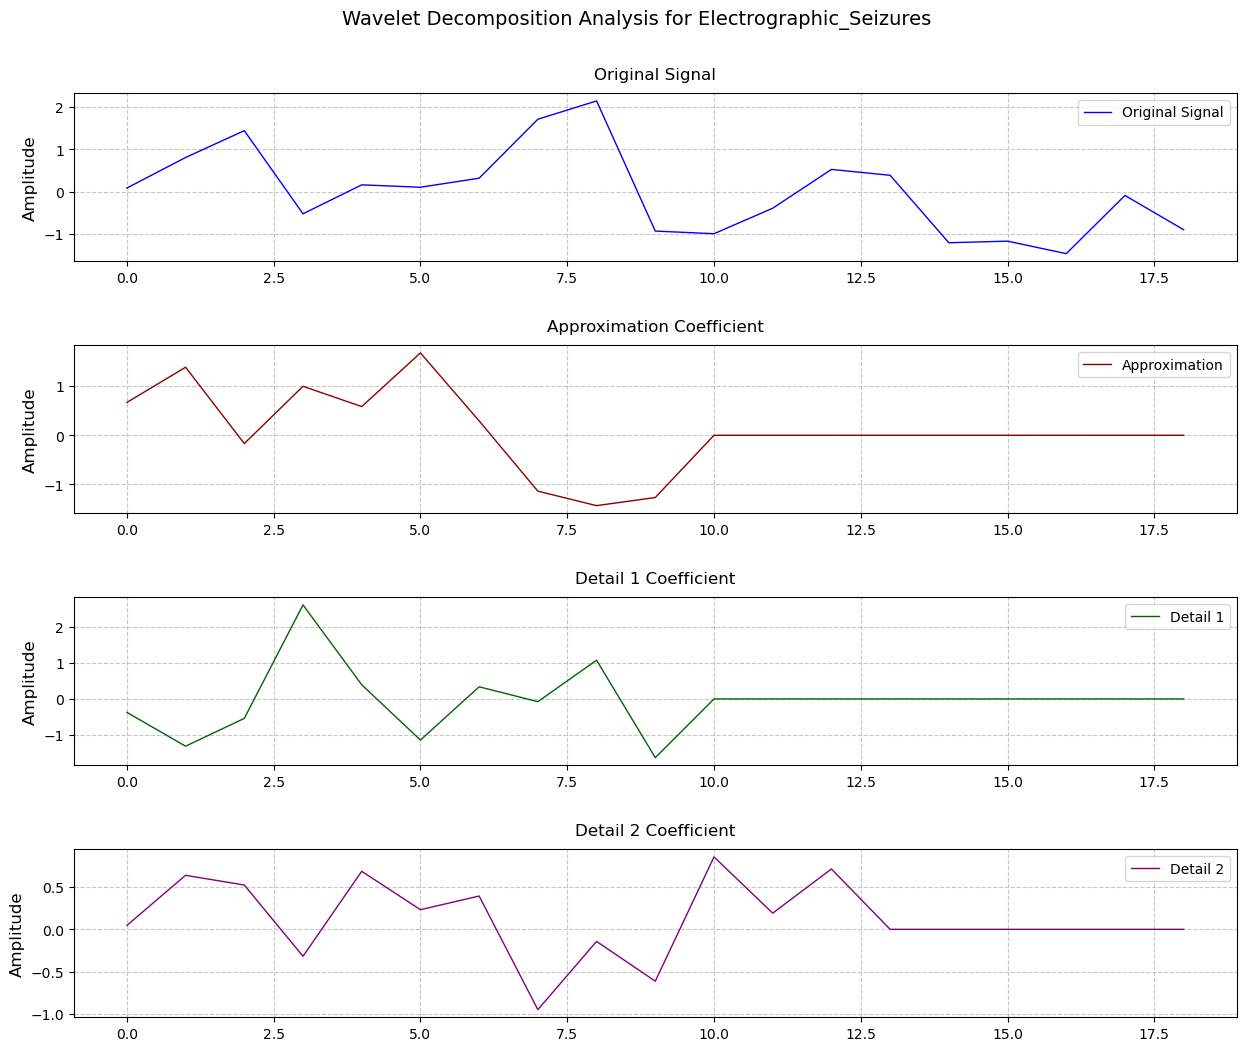

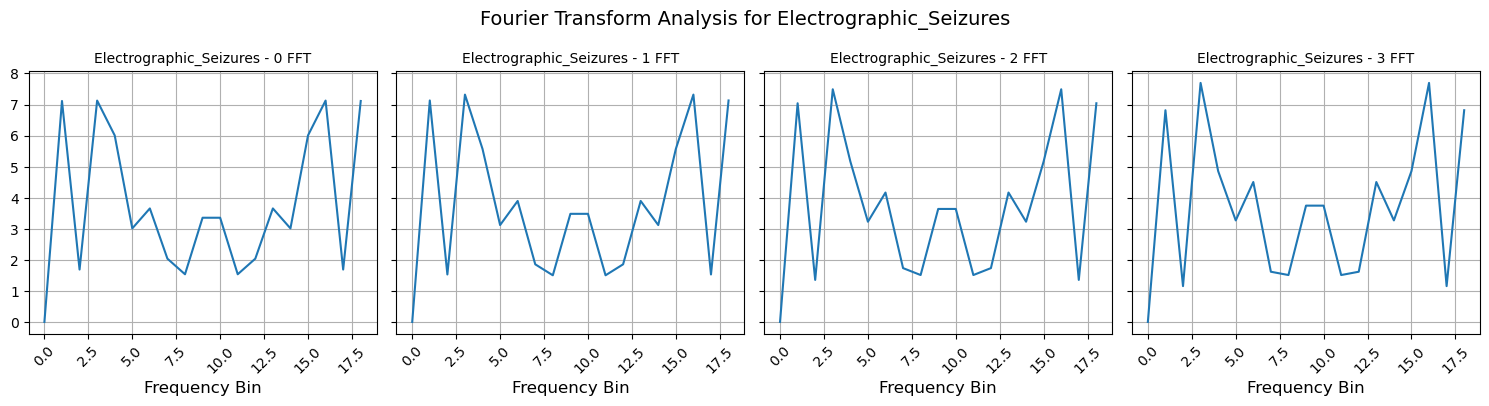

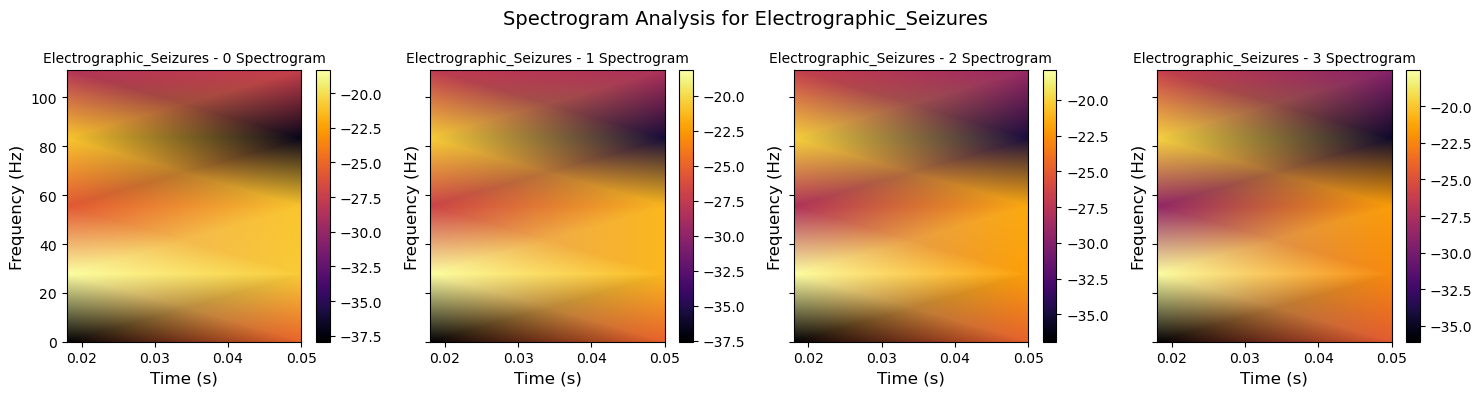


Processing Video_detected_Seizures_with_no_visual_change_over_EEG
File not found: C:/Users/Shree Harish V/Desktop/Advitiya Hack/Video_detected_Seizures_with_no_visual_change_over_EEG_statistics.csv

Similarity Analysis:
------------------------------
Approximation   : 3.5372
Detail 1        : 1.9256
Detail 2        : 1.3378

Most similar coefficient: Approximation
Similarity score: 3.5372


C:\Users\prags\anaconda3\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 2 is too high: all coefficients will experience boundary effects.
  warnings.warn(


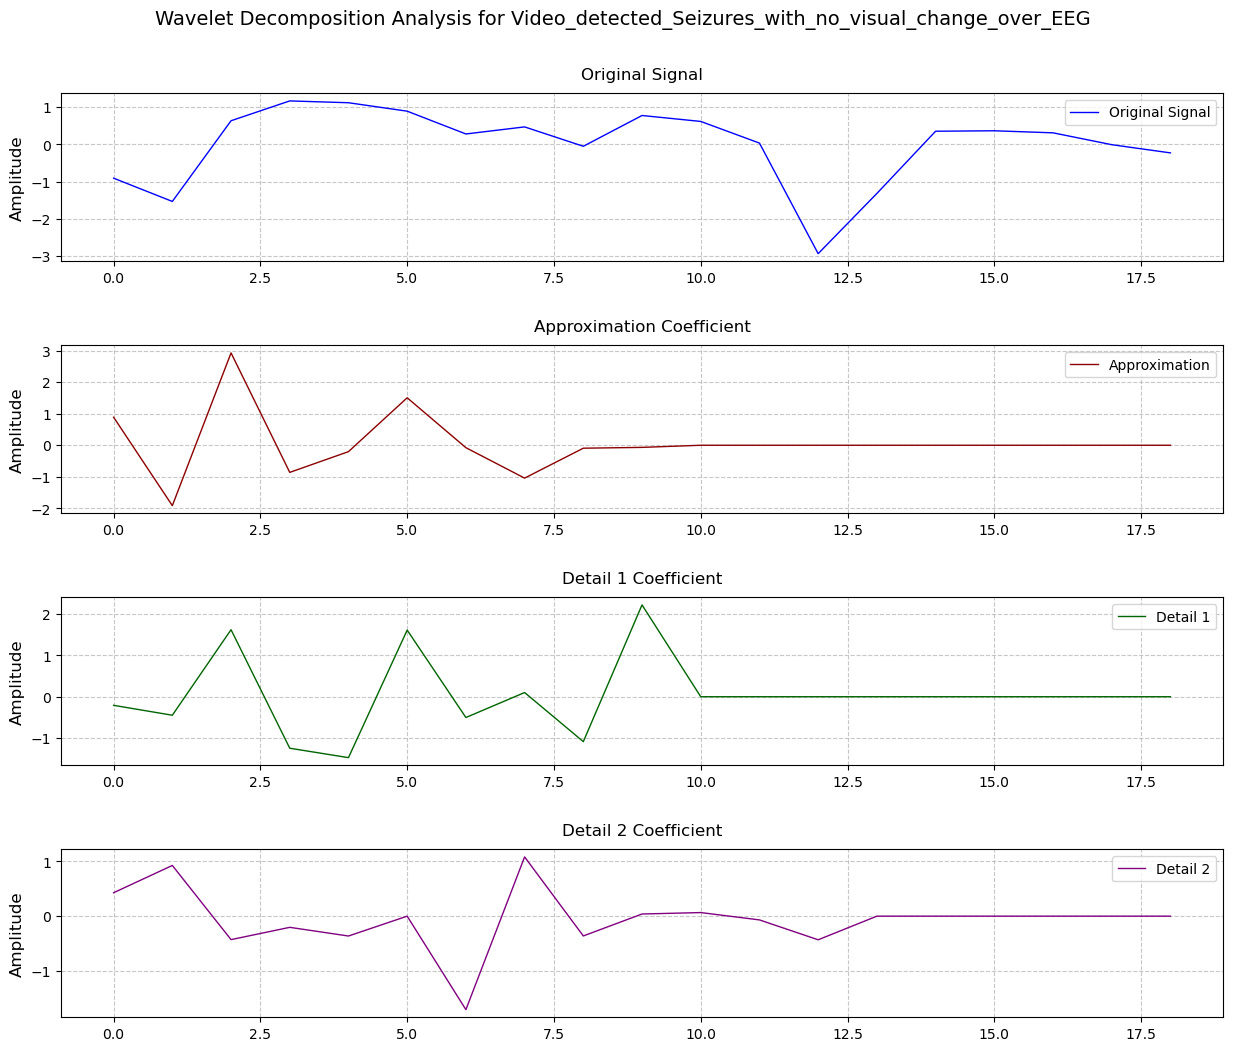

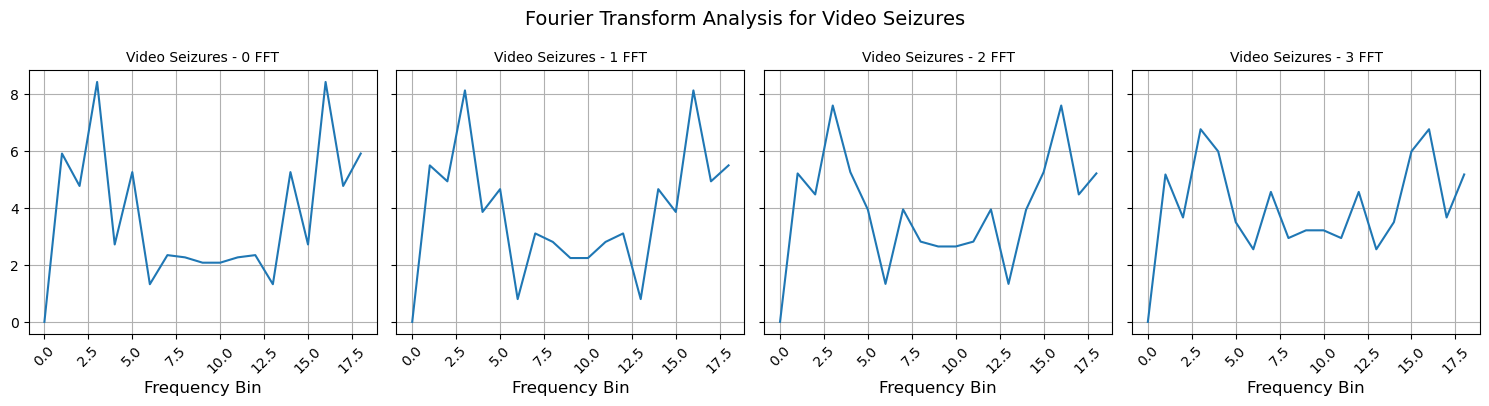

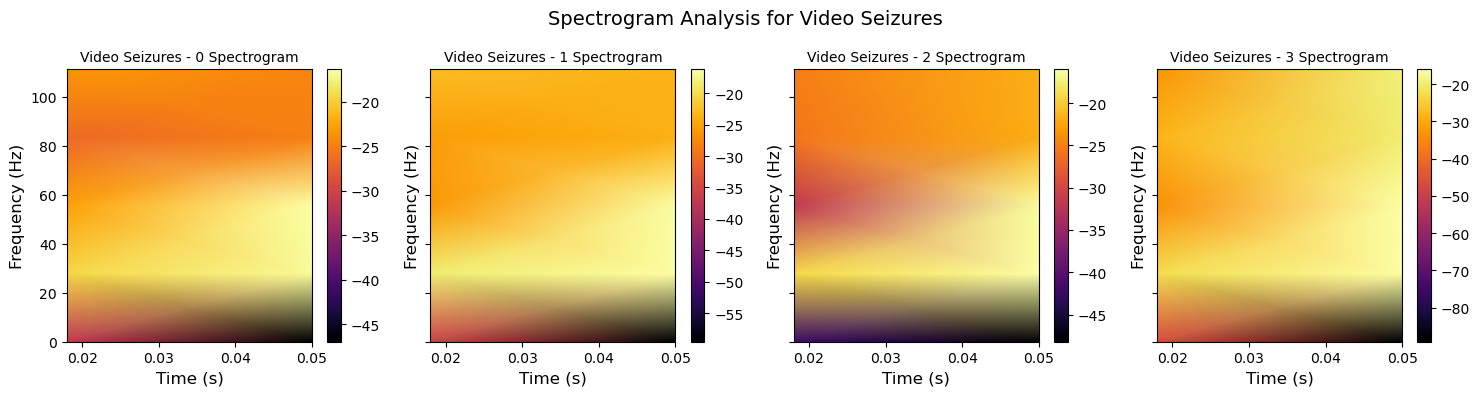

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
import pywt
from scipy.signal import correlate, spectrogram

# Function to plot wavelet coefficients
def plot_wavelet_coefficients(original_signal, coeffs, title):
    n_plots = len(coeffs) + 1
    fig = plt.figure(figsize=(15, 3 * n_plots))

    SMALL_SIZE = 10
    MEDIUM_SIZE = 12
    BIGGER_SIZE = 14

    plt.rc('axes', titlesize=SMALL_SIZE)
    plt.rc('axes', labelsize=MEDIUM_SIZE)
    plt.rc('legend', fontsize=SMALL_SIZE)

    ax1 = plt.subplot(n_plots, 1, 1)
    ax1.set_facecolor('white')
    plt.plot(original_signal.flatten(), color='blue', linewidth=1, label='Original Signal')
    plt.title(f'Original Signal', fontsize=12, pad=10)
    plt.ylabel('Amplitude')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='upper right')

    colors = ['darkred', 'darkgreen', 'purple', 'orange', 'brown']

    for i, (key, value) in enumerate(coeffs.items(), start=2):
        ax = plt.subplot(n_plots, 1, i)
        ax.set_facecolor('white')
        padded_coefficient = np.pad(value.flatten(), (0, len(original_signal.flatten()) - len(value.flatten())), 'constant')
        plt.plot(padded_coefficient, color=colors[i - 2], linewidth=1, label=key)
        plt.title(f'{key} Coefficient', fontsize=12, pad=10)
        plt.ylabel('Amplitude')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(loc='upper right')

    plt.subplots_adjust(hspace=0.5)
    fig.suptitle(f'Wavelet Decomposition Analysis for {title}', fontsize=14, y=0.95)
    fig.patch.set_facecolor('white')

    plt.xticks(fontsize=SMALL_SIZE)
    plt.yticks(fontsize=SMALL_SIZE)

    plt.show()

# Function to normalize data
def normalize_data(data):
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data)
    return pd.DataFrame(normalized_data, columns=data.columns)

# Function to perform wavelet decomposition
def wavelet_decomposition(data, level=2):
    wavelet_features = {}
    data = data.flatten() if isinstance(data, np.ndarray) else data.values.flatten()

    coeffs = pywt.wavedec(data, 'db4', level=level)

    wavelet_features['Approximation'] = coeffs[0]
    for i in range(1, len(coeffs)):
        wavelet_features[f'Detail {i}'] = coeffs[i]
    return wavelet_features

# Function to calculate similarity between the original signal and the coefficients
def calculate_similarity(original_signal, coefficient):
    original_signal = original_signal.flatten()
    coefficient = coefficient.flatten()
    padded_coefficient = np.pad(coefficient, (0, len(original_signal) - len(coefficient)), 'constant')
    correlation = correlate(original_signal, padded_coefficient, mode='valid')
    return np.max(np.abs(correlation))

# Function to extract frequency domain features
def extract_frequency_features(data):
    channel_data = data.iloc[:, 0]
    wavelet_features = wavelet_decomposition(channel_data)
    return wavelet_features

# Function to perform Fourier Transform
def fourier_transform(data):
    fft_features = {}
    for channel in data.columns:
        signal = data[channel].values
        fft_result = np.fft.fft(signal)
        fft_features[channel] = np.abs(fft_result)
    return pd.DataFrame(fft_features)

# Function to plot Fourier Transform (All FFT graphs in one horizontal figure)
def plot_fft_features(fft_features, title):
    channels = fft_features.columns
    num_channels = len(channels)
    max_channels_to_plot = min(4, num_channels)  # Limit to 4 channels for clarity

    fig, axes = plt.subplots(1, max_channels_to_plot, figsize=(15, 4), sharey=True)

    for i, channel in enumerate(channels):
        if i >= max_channels_to_plot:
            break

        # If class is "Video_detected_Seizures_with_no_visual_change_over_EEG", use shorter title
        short_title = "Video Seizures" if "Video_detected" in title else title

        axes[i].plot(fft_features[channel])
        axes[i].set_title(f'{short_title} - {channel} FFT')
        axes[i].set_xlabel('Frequency Bin')
        axes[i].grid(True)
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for clarity

    fig.suptitle(f'Fourier Transform Analysis for {short_title}', fontsize=14)
    plt.tight_layout()
    plt.show()

# Function to plot spectrograms
def plot_spectrograms(data, title):
    channels = data.columns
    num_channels = len(channels)
    max_channels_to_plot = min(4, num_channels)  # Limit to 4 channels for clarity

    fig, axes = plt.subplots(1, max_channels_to_plot, figsize=(15, 4), sharey=True)

    for i, channel in enumerate(channels):
        if i >= max_channels_to_plot:
            break

        short_title = "Video Seizures" if "Video_detected" in title else title

        # Ensure nperseg is valid
        signal_length = len(data[channel].values)
        nperseg = min(128, signal_length // 2)  # Adjust nperseg dynamically

        f, t, Sxx = spectrogram(data[channel].values, fs=250, nperseg=nperseg)
        
        # If spectrogram data is empty, skip plotting
        if Sxx.size == 0:
            print(f"Skipping spectrogram for {channel} due to insufficient data.")
            continue

        im = axes[i].pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='inferno')
        axes[i].set_title(f'{short_title} - {channel} Spectrogram')
        axes[i].set_ylabel('Frequency (Hz)')
        axes[i].set_xlabel('Time (s)')
        fig.colorbar(im, ax=axes[i])

    fig.suptitle(f'Spectrogram Analysis for {short_title}', fontsize=14)
    plt.tight_layout()
    plt.show()

# Function to pad wavelet features to the original signal length
def pad_wavelet_features(wavelet_features, original_signal_length):
    padded_features = {}
    for key, value in wavelet_features.items():
        padded_features[key] = np.pad(value, (0, original_signal_length - len(value)), 'constant')
    return padded_features

# Function to update CSV files with wavelet features
def update_csv_with_wavelet_features(csv_path, wavelet_features_padded):
    if os.path.exists(csv_path):
        # Load the existing data from the CSV
        df = pd.read_csv(csv_path)
        
        # Convert wavelet features to DataFrame
        wavelet_features_df = pd.DataFrame(wavelet_features_padded)
        
        # Concatenate the wavelet features with the original data
        updated_df = pd.concat([df, wavelet_features_df], axis=1)
        
        # Save the updated DataFrame back to CSV
        updated_df.to_csv(csv_path, index=False)
        print(f"Updated {csv_path} with wavelet features.")
    else:
        print(f"File not found: {csv_path}")

base_path = r'C:\Users\prags\Desktop\hackathon\EEG_Data\train_data'
classes = ['Normal', 'Complex_Partial_Seizures', 'Electrographic_Seizures',
           'Video_detected_Seizures_with_no_visual_change_over_EEG']
data_points = {cls: None for cls in classes}

random.seed(42)

print(f"\nLoading data from: {base_path}")
for cls in classes:
    cls_folder = os.path.join(base_path, cls)
    if os.path.exists(cls_folder):
        files = os.listdir(cls_folder)
        if files:
            file_path = os.path.join(cls_folder, random.choice(files))
            print(f"Selected {cls} file: {os.path.basename(file_path)}")
            data_points[cls] = np.load(file_path)

for cls in classes:
    if data_points[cls] is not None:
        print(f"\n{'=' * 50}")
        print(f"Processing {cls}")
        print(f"{'=' * 50}")

        data = pd.DataFrame(data_points[cls])

        normalized_data = normalize_data(data)

        # Save combined wavelet features to a single CSV file for each class
        wavelet_features = extract_frequency_features(normalized_data)
        original_signal_length = len(normalized_data)
        wavelet_features_padded = pad_wavelet_features(wavelet_features, original_signal_length)

        # Update CSV with wavelet features
        csv_path = f'C:/Users/Shree Harish V/Desktop/Advitiya Hack/{cls}_statistics.csv'
        update_csv_with_wavelet_features(csv_path, wavelet_features_padded)

        original_signal = normalized_data.iloc[:, 0]

        similarities = {}
        for key, value in wavelet_features.items():
            similarity = calculate_similarity(original_signal.values, value)
            similarities[key] = similarity

        most_similar_coeff = max(similarities.items(), key=lambda x: x[1])

        print("\nSimilarity Analysis:")
        print("-" * 30)
        for coeff, score in similarities.items():
            print(f"{coeff:15} : {score:.4f}")
        print("\nMost similar coefficient:", most_similar_coeff[0])
        print(f"Similarity score: {most_similar_coeff[1]:.4f}")

        plot_wavelet_coefficients(original_signal.values, wavelet_features, cls)

        # Fourier Transform
        fft_features = fourier_transform(normalized_data)
        plot_fft_features(fft_features, cls)

        # Spectrogram
        plot_spectrograms(normalized_data, cls)
    else:
        print(f"\nNo data loaded for class: {cls}")
